In [1]:
import numpy as np
import numpy.typing as npt
import pandas as pd

from sklearn.preprocessing import StandardScaler

import umap

In [2]:
%load_ext rpy2.ipython

In [3]:
def run_umap(df: pd.DataFrame, nn: int=15, md: float=0.2, somr: float=0.25, nc: int=2) -> tuple[npt.NDArray[np.float64], umap.UMAP]:
    umapper = umap.UMAP(
        n_neighbors=nn,
        n_components=nc,
        min_dist=md,
        set_op_mix_ratio=somr,
        metric='euclidean',
        # UMAP figures change with every run if not seeded
        random_state=42
    )

    return (umapper.fit_transform(df), umapper)

In [4]:
stops_tidy = pd.read_csv('../data/corpus.csv',index_col=0)
stops_tidy

,Translator,Work,Chunk,atqui,aut,autem,certe,ceu,confestim,cum,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
0,Bur,Com,quoniam quidem ex calido et frigido et sicco e...,0.0,0.097100,0.534050,0.0,0.0,0.0,0.145650,...,0.000000,0.000000,0.000000,0.0,0.145650,0.218475,0.024275,0.0,0.218475,0.0
1,Bur,Com,sermo non quod nunquam fit in uno eodemque cor...,0.0,0.200297,0.578636,0.0,0.0,0.0,0.155787,...,0.000000,0.000000,0.022255,0.0,0.222552,0.311573,0.022255,0.0,0.066766,0.0
2,Bur,Com,horis anni invenire quartam coniugationem comp...,0.0,0.230022,0.575055,0.0,0.0,0.0,0.000000,...,0.046004,0.000000,0.000000,0.0,0.253024,0.138013,0.046004,0.0,0.230022,0.0
3,Bur,Com,quod necesse est in ea putrefieri omnia incipi...,0.0,0.243044,0.710436,0.0,0.0,0.0,0.037391,...,0.000000,0.000000,0.000000,0.0,0.280435,0.168261,0.000000,0.0,0.037391,0.0
4,Bur,Com,de ipsis per capitula quantum ad presentia uti...,0.0,0.649435,0.409426,0.0,0.0,0.0,0.070591,...,0.000000,0.000000,0.000000,0.0,0.395308,0.211772,0.000000,0.0,0.070591,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Bur,Fid,ostendat quod secundum veritatem est homo cum ...,0.0,0.024500,0.538996,0.0,0.0,0.0,0.171499,...,0.000000,0.000000,0.000000,0.0,0.587995,0.024500,0.000000,0.0,0.024500,0.0
1181,Bur,Fid,causative dicere ut hoc tibi soli peccavi et p...,0.0,0.000000,0.421459,0.0,0.0,0.0,0.049583,...,0.000000,0.000000,0.000000,0.0,0.223125,0.049583,0.024792,0.0,0.074375,0.0
1182,Bur,Fid,condemnavit peccatum in carne ut iustitia legi...,0.0,0.000000,0.738485,0.0,0.0,0.0,0.096324,...,0.000000,0.032108,0.000000,0.0,0.481621,0.064216,0.032108,0.0,0.032108,0.0
1183,Bur,Fid,uxorem suam et concepit et genuit quare propte...,0.0,0.000000,0.666795,0.0,0.0,0.0,0.156893,...,0.000000,0.078446,0.000000,0.0,0.274563,0.039223,0.000000,0.0,0.039223,0.0


In [5]:
wil = stops_tidy[stops_tidy.Translator == "Wil"]
bar = stops_tidy[stops_tidy.Translator == "Bar"]
myst3 = stops_tidy[stops_tidy.Work == "3"]
myst3 = myst3.replace("Myst", "Myst3")
myst6 = stops_tidy[stops_tidy.Work == "6"]
myst6 = myst6.replace("Myst", "Myst6")

In [6]:
bar_myst = pd.concat([bar, myst3, myst6])
bar_X = bar_myst.drop(["Translator", "Work", "Chunk"], axis=1)
umap_cols, umapper = run_umap(
    StandardScaler().fit_transform(bar_X), md=0.1, nn=8, somr=0.75
)
bar_myst.insert(2, "Y", umap_cols[:, 1])
bar_myst.insert(2, "X", umap_cols[:, 0])

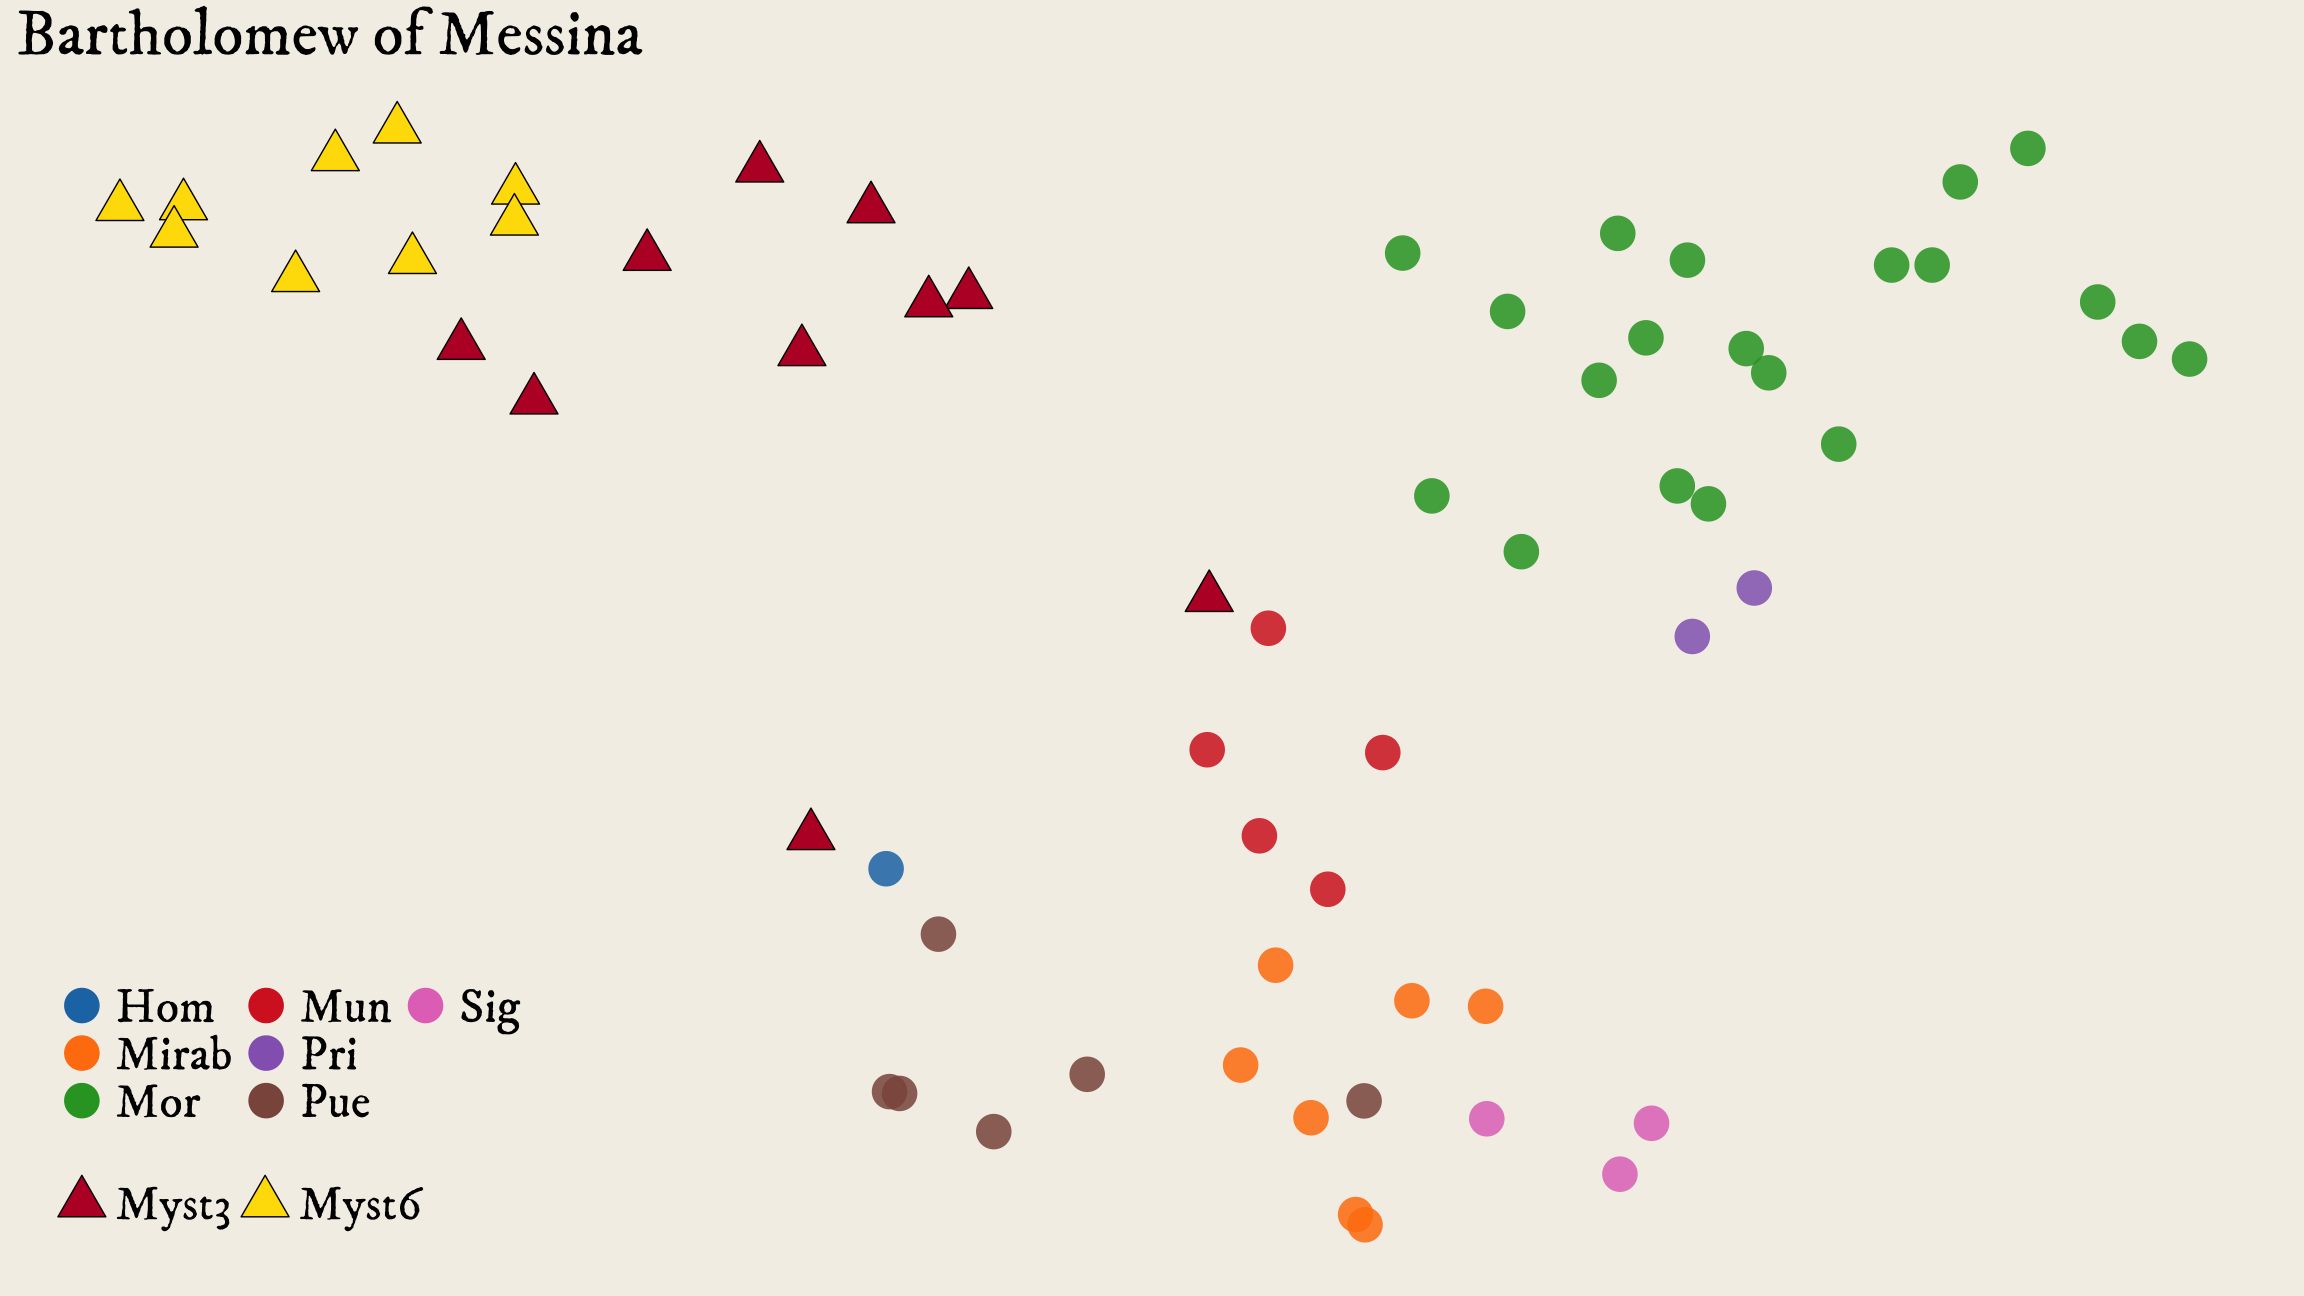

In [13]:
%%R -i bar_myst -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
library(stringr)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8'
fgcol = 'black'

ggplot(data=bar_myst, aes(x=X, y=Y)) +
geom_point(data=dplyr::filter(bar_myst,str_detect(Translator,'Myst',negate=TRUE)),size=8, alpha=0.85, shape=16, aes(color=Work)) +
geom_point(data=dplyr::filter(bar_myst,str_detect(Translator,'Myst')), size=8, shape=24, aes(fill=Translator), alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s", guide = 'none') +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("Bartholomew of Messina") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=8,alpha=1)),
    fill = guide_legend(ncol=2,override.aes =list(size=8,alpha=1))
) +    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol,color=bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.12,0.15),
        legend.text=element_text(size=24),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_bar.png"
# ggsave(fn, dpi=300, width=16, height=9)

In [8]:
wil_myst = pd.concat([wil, myst3, myst6])
wil_X = wil_myst.drop(["Translator", "Work", "Chunk"], axis=1)
umap_cols, umapper = run_umap(
    StandardScaler().fit_transform(wil_X), md=0.2, nn=8, somr=0.75
)
wil_myst.insert(2, "Y", umap_cols[:, 1])
wil_myst.insert(2, "X", umap_cols[:, 0])

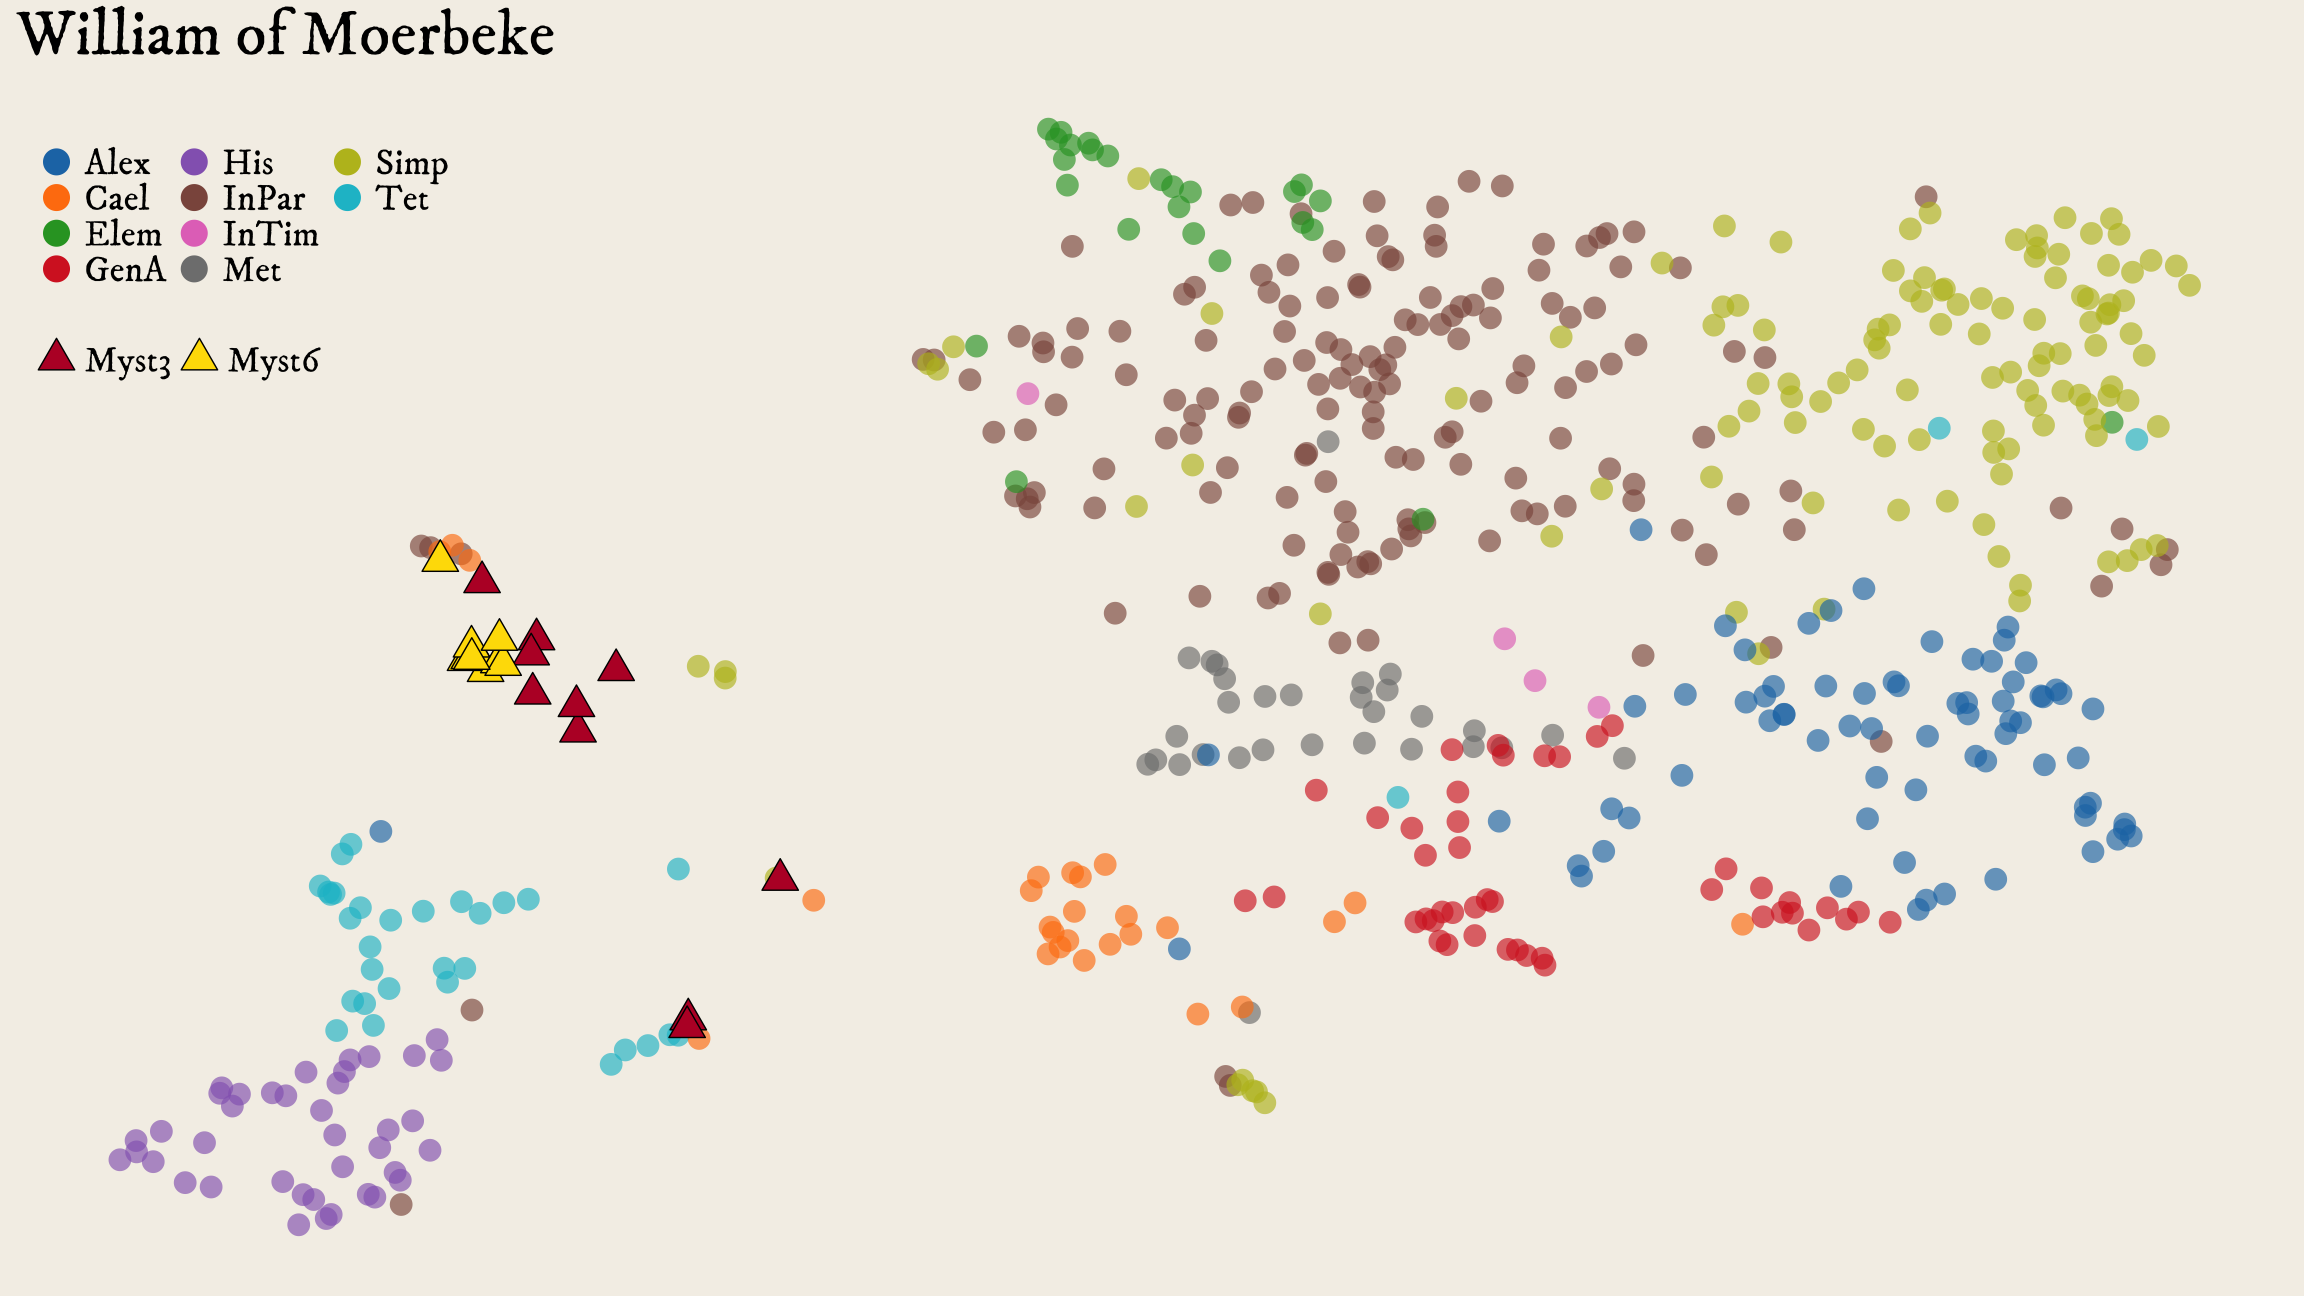

In [15]:
%%R -i wil_myst -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
library(stringr)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8'
fgcol = 'black'

ggplot(data=wil_myst, aes(x=X, y=Y)) +
geom_point(data=dplyr::filter(wil_myst,str_detect(Translator,'Myst',negate=TRUE)),size=5, alpha=0.65, shape=16, aes(color=Work)) +
geom_point(data=dplyr::filter(wil_myst,str_detect(Translator,'Myst')), size=6, shape=24, aes(fill=Translator), alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s", guide = 'none') +

theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("William of Moerbeke") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=6,alpha=1)),
    fill = guide_legend(ncol=2,override.aes =list(size=6,alpha=1))
) +    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol,color=bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.1,0.85),
        legend.text=element_text(size=18),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_wil.png"
# ggsave(fn, dpi=300, width=16, height=9)

In [10]:
all = pd.concat([stops_tidy[stops_tidy.Translator != "Myst"], myst3, myst6])

all_X = all.drop(["Translator", "Work", "Chunk"], axis=1)
ss = StandardScaler()
umap_cols, umapper = run_umap(ss.fit_transform(all_X), nc=2, nn=8, somr=0.75, md=0.4)
all.insert(2, "Y", umap_cols[:, 1])
all.insert(2, "X", umap_cols[:, 0])

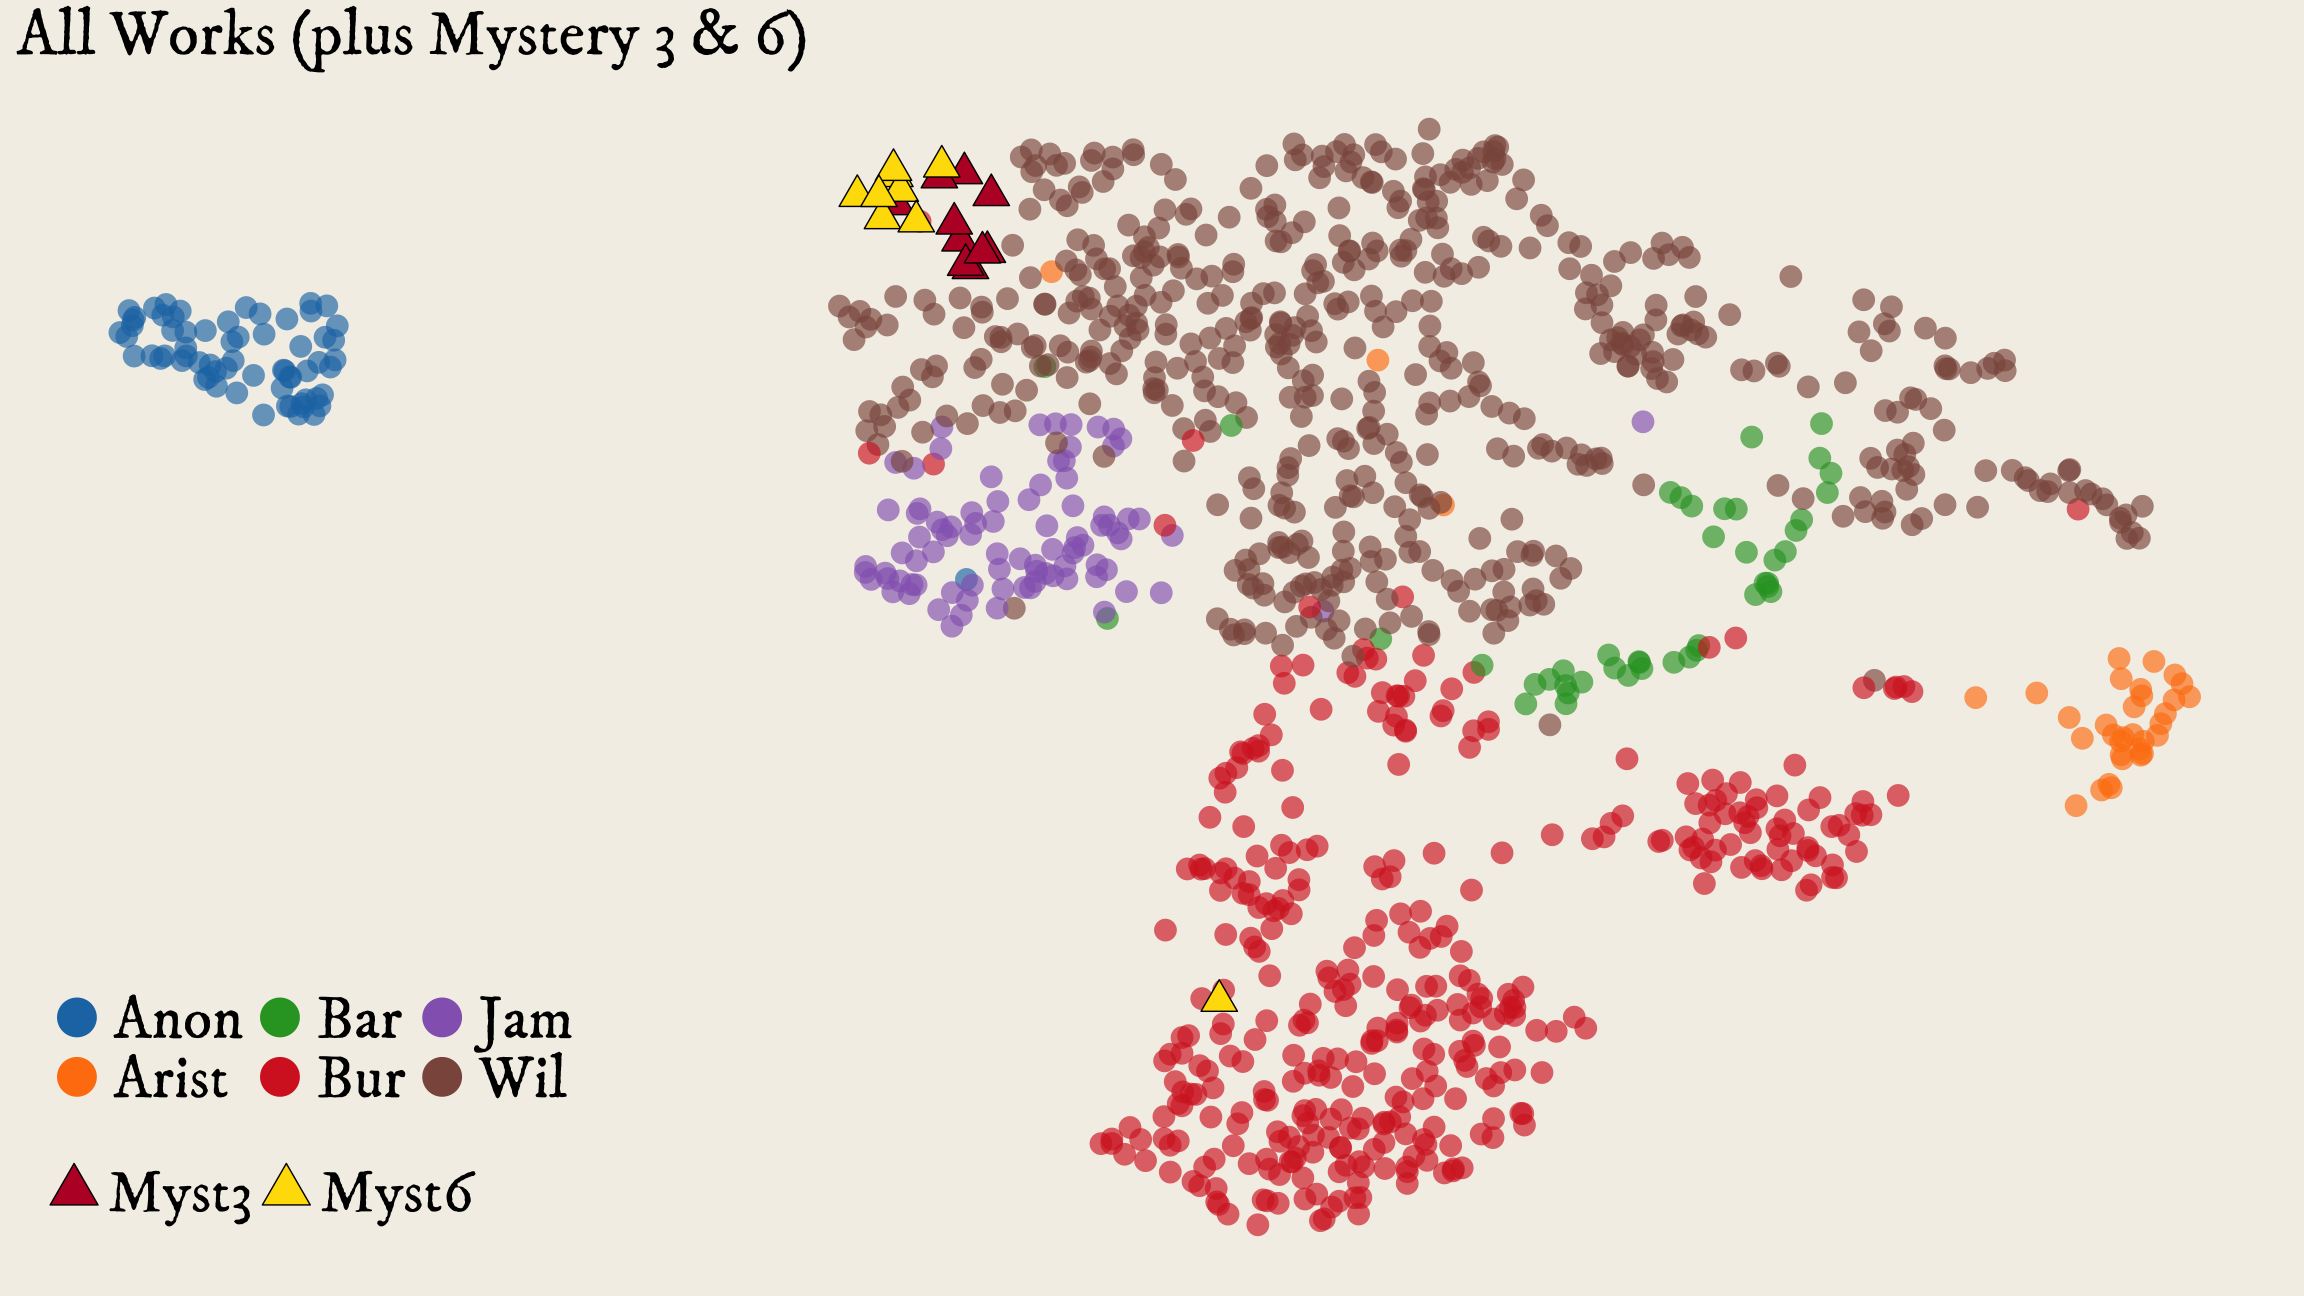

In [17]:
%%R -i all -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8' # antique paper
fgcol = 'black'

ggplot(data=all, aes(x=X, y=Y)) +
geom_point(data = dplyr::filter(all,str_detect(Translator,'Myst',negate=TRUE)),size=5, alpha=0.65, shape=16, aes(color=Translator)) +
geom_point(data=dplyr::filter(all,str_detect(Translator,'Myst')), size=6, shape=24, aes(fill=Translator), alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
scale_fill_paletteer_d("nbapalettes::heat_90s") +
theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("All Works (plus Mystery 3 & 6)") +
guides(
    color = guide_legend(ncol=3,override.aes =list(size=9,alpha=1)),
    fill = guide_legend(ncol=2,override.aes =list(size=8,alpha=1))
) +
    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol,color=bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.13,0.15),
        legend.text=element_text(size=30),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

# fn <- "../figures/umap_all.png"
# ggsave(fn, dpi=300, width=16, height=9)